<a href="https://colab.research.google.com/github/Fardeen210/Fardeen_INFO5731_Fall2024/blob/main/INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
# Write your code here
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

file_path = r"/content/gdrive/MyDrive/Dataset/IMDB Dataset.csv"

df = pd.read_csv(file_path, usecols= ["review"], engine='python')

df.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [3]:
data_df = pd.DataFrame()
data_df['Moview_review'] = df['review']

In [4]:
stop_words = [
    'a', 'an', 'the', 'and', 'or', 'but', 'if','of', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do',
    'does', 'did', 'can', 'could',
    'may', 'might', 'must', 'this', 'that', 'these', 'those', 'i', 'you',
    'my', 'your', 'his', 'her', 'its', 'our', 'their' ,'to']
punctuations = ['.', ',', '!', '?', ';', ':', '"', '(', ')']
html_tags = ['<br>', '<br/>', '<br />', '<p>', '</p>']

def tokenize(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text= text.lower()

    for p in punctuations:
        text = text.replace(p, '')
    for h in html_tags:
        text = text.replace(h, '')
    words = [word for word in text.split() if word not in stop_words]

    return words

tokenized_reviews = data_df['Moview_review'].apply(tokenize)

In [6]:
tokenized_reviews_modifed = pd.DataFrame()
tokenized_reviews_modifed_100 = pd.DataFrame()
tokenized_reviews_modifed['Moview_review'] = tokenized_reviews[:10000]
tokenized_reviews_modifed_100['Moview_review'] = tokenized_reviews[:100]
tokenized_reviews_modifed.head()

,Moview_review
0,"[one, other, reviewers, mentioned, after, watc..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, on, too..."
3,"[basically, there's, family, where, little, bo..."
4,"[petter, mattei's, love, in, time, money, visu..."


In [7]:
ans3=[]
def generate_trigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans3.extend([' '.join(key) for key in temp])
  return ans3

ans2=[]
def generate_bigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans2.extend([' '.join(key) for key in temp])
  return ans2

ans1=[]
def generate_unigrams(text, ngram):
  for tokens in text:
    temp = zip(*[tokens[i:] for i in range(ngram)])
    ans1.extend([' '.join(key) for key in temp])
  return ans1

In [8]:
def freq_counter(ngrams):
  freq = {}
  for gram in ngrams:
    if gram in freq:
        freq[gram] += 1
    else:
        freq[gram] = 1
  return freq

In [9]:
bi_gram = generate_bigrams(tokenized_reviews_modifed['Moview_review'], 2)
unigram = generate_unigrams(tokenized_reviews_modifed['Moview_review'], 1)
trigrams = generate_trigrams(tokenized_reviews_modifed['Moview_review'], 3)

freq1 = freq_counter(unigram)
freq2 = freq_counter(bi_gram)
freq3 = freq_counter(trigrams)

In [10]:
def diplay_freq(freq):
  sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
  for i,j in sorted_freq[:10]:
    print(f"'{i}': {j}")

print("Top 10 trigrams:")
tri_freq = diplay_freq(freq3)
print("\n")
print("Top 10 bigrams:")
bi_freq = diplay_freq(freq2)
print("\n")
print("Top 10 unigrams:")
uni_freq = diplay_freq(freq1)

Top 10 trigrams:
'as well as': 427
'in love with': 214
'at same time': 185
'i've ever seen': 167
'as much as': 159
'as good as': 148
'as far as': 139
'all in all': 119
'for most part': 105
'in real life': 100


Top 10 bigrams:
'in movie': 1305
'in film': 1211
'at least': 925
'as well': 904
'more than': 781
'at all': 728
'as it': 689
'so much': 618
'it would': 589
'it not': 572


Top 10 unigrams:
'in': 36604
'it': 30220
'as': 17911
'with': 17390
'for': 17210
'movie': 16810
'film': 14550
'on': 13363
'not': 11738
'he': 10126


In [15]:
#  count(w2 w1) / count(w2)
def calculate_bigram_probabilities(bigram_freq, unigram_freq):
    bigram_probabilities = {}
    for bigram, freq in bigram_freq.items():
      w2,w1 = bigram.split()
      if w2 in unigram_freq:
        probability = freq / unigram_freq[w2]
        bigram_probabilities[bigram] = probability
      else:
        bigram_probabilities[w2] = 0
    return bigram_probabilities
bigram_prob = calculate_bigram_probabilities(freq2, freq1)

In [25]:
data_prob = []

for i, (word, probability) in enumerate(bigram_prob.items()):
    if i >= 100:
        break
    data_prob.append({"word": word, "probability": probability})

In [28]:
bigram_prob_df = pd.DataFrame(data_prob)
bigram_prob_df.head(100)

,word,probability
0,one other,0.006050
1,other reviewers,0.008705
2,reviewers mentioned,0.049505
3,mentioned after,0.004348
4,after watching,0.041013
...,...,...
95,muslims gangstas,0.050000
96,gangstas latinos,1.000000
97,latinos christians,0.200000
98,christians italians,0.038462


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [7]:
tokenized_reviews_modifed_100

,Moview_review
0,"[one, other, reviewers, mentioned, after, watc..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, on, too..."
3,"[basically, there's, family, where, little, bo..."
4,"[petter, mattei's, love, in, time, money, visu..."
...,...
95,"[daniel, day-lewis, most, versatile, actor, al..."
96,"[guess, would, originally, going, at, least, t..."
97,"[well, like, watch, bad, horror, b-movies, cau..."
98,"[worst, movie, ever, seen, as, well, as, worst..."


In [8]:
# step1: bulding vocab
vocab = set()
for review in tokenized_reviews_modifed_100['Moview_review']:
    vocab.update(review)
vocab = list(vocab)

In [59]:
from collections import Counter
def compute_tf(review):
  tf = []
  for w in tokenized_reviews_modifed_100['Moview_review']:
    tf_dict = {}
    total_words = len(w)
    word_counts = Counter(w)
    for word in vocab:
        tf_dict[word] = word_counts[word] / total_words
    tf.append(tf_dict)
  return tf

In [60]:
tf= compute_tf(tokenized_reviews_modifed_100['Moview_review'])
tf_df = pd.DataFrame(tf)
print("TF Matrix:")
print(tf_df)

TF Matrix:
    davis     palsy  killer'  bullshits  surrounds  sickos  complex  bored  \
0     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
1     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
2     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
3     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
4     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
..    ...       ...      ...        ...        ...     ...      ...    ...   
95    0.0  0.005464      0.0        0.0        0.0     0.0      0.0    0.0   
96    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
97    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
98    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
99    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   

    laugh  narration  ...  humorbut  approached  'po

In [61]:
import math
def compute_idf(review):
  idf = {}
  total_docs = len(tokenized_reviews_modifed_100['Moview_review'])
  for word in vocab:
    count = sum(1 for review in tokenized_reviews_modifed_100['Moview_review'] if word in review)
    idf[word] = math.log(total_docs / (1 + count))
  return idf

In [62]:
idf = compute_idf(tokenized_reviews_modifed_100['Moview_review'])
idf_df = pd.DataFrame([idf])

In [110]:
def compute_tf_idf(tf, idf):
  tf_idf = []
  for tf_doc in tf:
    tf_idf_doc = {}
    for word in vocab:
        tf_idf_doc[word] = tf_doc[word] * idf[word]
    tf_idf.append(tf_idf_doc)
  return tf_idf

In [111]:
tf_idf = compute_tf_idf(tf, idf)
tf_idf_df = pd.DataFrame(tf_idf)
print("TF-IDF Matrix:")
print(tf_idf_df)

TF-IDF Matrix:
    davis     palsy  killer'  bullshits  surrounds  sickos  complex  bored  \
0     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
1     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
2     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
3     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
4     0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
..    ...       ...      ...        ...        ...     ...      ...    ...   
95    0.0  0.021377      0.0        0.0        0.0     0.0      0.0    0.0   
96    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
97    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
98    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   
99    0.0  0.000000      0.0        0.0        0.0     0.0      0.0    0.0   

    laugh  narration  ...  humorbut  approached 

In [112]:

query = "A dreadful movie lacking in any memorable performance or meaningful character development.The storyline was shallow, the acting felt forced, and the characters were one-dimensional, leaving no lasting impression. Overall, it was a disappointing experience with nothing outstanding to offer."

query_tokens = query.lower().split()
tf_query = Counter(query_tokens)
total_query_words = len(tf_query)
tf_idf_query = {word: (tf_query[word] / total_query_words) * idf.get(word, 0) for word in vocab}

In [113]:
def cosine_similarity(vector1, vector2):
  product = sum(vector1[word] * vector2[word] for word in vocab)
  m1 = math.sqrt(sum(vector1[word] ** 2 for word in vocab))
  m2 = math.sqrt(sum(vector2[word] ** 2 for word in vocab))
  if m1 == 0 or m2 == 0:return 0
  return product / (m1 * m2)

In [115]:
similarities = []
def rank_documents(mat):
  for i, doc_vector in enumerate(mat):
    similarity = cosine_similarity(doc_vector, tf_idf_query)
    similarities.append((i, similarity))
  return similarities

ranking = rank_documents(tf_idf)

In [117]:
orginal_docs = sorted(similarities, key=lambda x: x[1], reverse=True)

In [119]:
# Display results
print("Ranked Documents based on Query Similarity:")
for rank, (doc_index, score) in enumerate(orginal_docs[:5], 1):
    print(f"Rank {rank}: Document {doc_index + 1} (Score: {score:.4f}) - {' '.join( tokenized_reviews_modifed_100['Moview_review'] [doc_index])}")

Ranked Documents based on Query Similarity:
Rank 1: Document 61 (Score: 0.0766) - what happened what we here basically solid plausible premise with decent talented cast somewhere movie loses it actually it never really got going there little excitement when we find out angie not really pregnant then find out she after all it steve martin who very talented person usually brings lot movie dreadful entire character not even close important movie other than make it longer really would liked see more interactions between main characters kate angie maybe try not for pure comedy which unfortunately it not maybe drama with comedic elements think movie it very funny since both actresses quite funny in own ways sitting here think numerous scenarios would riot
Rank 2: Document 95 (Score: 0.0718) - watched series out curiositywanting see they possibly with all modern technologyout cecil b demille's classic epic 1956 starring charleton hestonyul brenner sir cedric hardwicke course let down yes they

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [48]:
tokenized_reviews_modifed['Moview_review']

,Moview_review
0,"[one, other, reviewers, mentioned, after, watc..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, on, too..."
3,"[basically, there's, family, where, little, bo..."
4,"[petter, mattei's, love, in, time, money, visu..."
...,...
9995,"[fun, entertaining, movie, about, wwii, german..."
9996,"[give, me, break, how, anyone, say, good, hock..."
9997,"[movie, bad, movie, after, watching, endless, ..."
9998,"[movie, probably, made, entertain, middle, sch..."


In [47]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(sentences=tokenized_reviews_modifed['Moview_review'], vector_size=300, window=5, min_count=1, workers=4)

In [50]:
words = list(model.wv.index_to_key)
print(words)


['in', 'it', 'as', 'with', 'for', 'movie', 'film', 'on', 'not', 'he', 'one', 'at', 'all', 'by', 'they', 'from', 'who', 'like', 'so', 'just', 'about', 'out', "it's", 'some', 'what', 'there', 'good', 'when', 'more', 'very', 'would', 'no', 'even', 'up', 'she', 'which', 'time', 'only', 'see', 'really', 'story', 'me', '-', 'than', 'much', 'get', 'well', 'will', 'because', 'we', 'into', 'other', 'great', 'bad', 'people', 'how', 'most', 'also', 'first', 'him', "don't", 'made', 'them', 'make', 'way', 'then', 'any', 'too', 'movies', 'think', 'after', 'characters', 'never', 'watch', 'little', 'films', 'many', 'seen', 'character', 'show', 'two', 'love', 'know', 'where', 'best', 'acting', 'plot', 'ever', 'life', 'off', 'better', 'still', 'say', 'over', 'scene', 'while', 'end', 'scenes', 'something', 'here', 'go', 'why', 'man', 'such', 'through', 'should', 'real', 'watching', "doesn't", 'back', 'before', "i'm", 'years', 'thing', 'actors', 'though', 'look', 'actually', "didn't", 'now', 'nothing', 'g

In [51]:
# Get vector for a specific word
vector = model.wv['good']
print(vector)


[ 0.14812502  1.2313756  -0.3531228  -1.3344723   0.38856363 -1.7270982
  1.0281272   1.8131695  -0.30594954 -0.99459934 -0.02037878 -1.2353387
 -0.19081624 -0.02657885 -0.7386289   0.33907402 -0.76901793 -0.16927359
 -0.5364387  -1.1054392   0.206438    0.27198094 -0.02231303  0.47744593
 -0.17200308 -0.3637383  -0.9428099  -0.90026957 -0.74031126 -0.09316146
  0.56859624 -0.06059235  0.6105258   0.4668731  -0.17870408  1.5147438
  0.5627431  -0.7166717  -0.5044795  -0.67655677  0.53192896  0.984604
 -0.44517642  0.11044239  0.7279689   0.6084523   1.0653661   0.57101786
  0.6600857   0.24135402  1.0627434  -0.6985176   0.13571684 -0.29637298
 -0.1399447   1.1520194  -0.17133304  0.9918438  -0.16474743 -0.10573303
 -0.71023947 -0.47431985 -0.46316275  0.62016594 -0.3586205   1.2099932
  0.3821286  -0.06487238  0.25457323 -0.19629882 -0.56373227  0.20194156
  0.73595697 -0.49470577  0.04584586  1.1116394  -1.3790082  -1.1514488
 -0.1112567   1.092676    0.14690562  0.1680548  -0.027752

In [52]:
model.save('model.bin')

In [53]:
print(model)

Word2Vec<vocab=89988, vector_size=300, alpha=0.025>


In [54]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [55]:
# taking a sample of 200 words to display
words = list(model.wv.index_to_key)[:200]
word_vectors = model.wv[words]

In [56]:
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

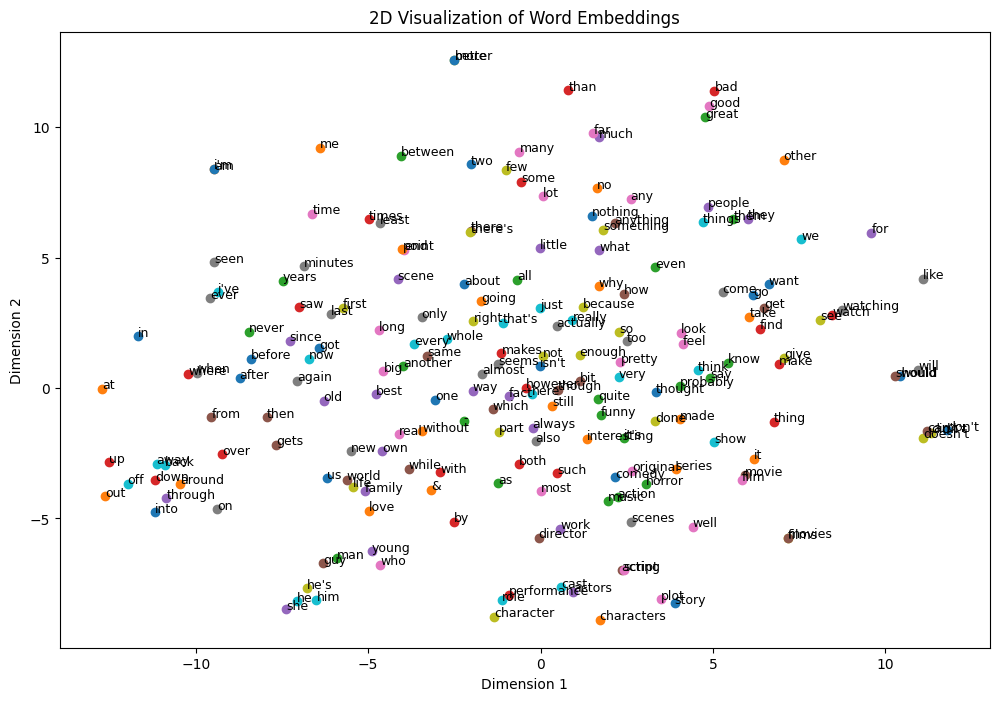

In [57]:
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [121]:
# I have used a data set which already had sentiment


new_df = pd.read_csv(file_path, engine='python')

new_df.head()

new_df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [123]:
new_df['cleaned_Review'] = new_df['review'].apply(tokenize)

In [124]:
new_df

,review,sentiment,cleaned_Review
0,One of the other reviewers has mentioned that ...,positive,"[one, other, reviewers, mentioned, after, watc..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, on, too..."
3,Basically there's a family where a little boy ...,negative,"[basically, there's, family, where, little, bo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei's, love, in, time, money, visu..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, down, right, good, job, it, w..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[am, catholic, taught, in, parochial, elementa..."
49998,I'm going to have to disagree with the previou...,negative,"[i'm, going, disagree, with, previous, comment..."


In [126]:
csv_file_path = '/content/gdrive/MyDrive/Dataset/IMDB Dataset1.csv'
new_df.to_csv(csv_file_path)

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer